In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Uber-Trip-Analysis -> EDA
##Objective:
To explore the cleaned dataset and identify key trends, distributions, and relationships between trips, active vehicles, and productivity.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/uberTripAnalysis/data/cleaned.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,trips_per_driver
0,B02512,2015-01-01,190,1132,5.957895
1,B02765,2015-01-01,225,1765,7.844444
2,B02764,2015-01-01,3427,29421,8.585060
3,B02682,2015-01-01,945,7679,8.125926
4,B02617,2015-01-01,1228,9537,7.766287


In [11]:
df.describe()

,date,active_vehicles,trips,trips_per_driver
count,354,354.000000,354.000000,354.000000
mean,2015-01-30 00:00:00,1307.435028,11667.316384,8.542137
min,2015-01-01 00:00:00,112.000000,629.000000,4.991189
25%,2015-01-15 00:00:00,296.750000,2408.500000,7.554754
50%,2015-01-30 00:00:00,1077.000000,9601.000000,8.620475
75%,2015-02-14 00:00:00,1417.000000,13711.250000,9.489493
max,2015-02-28 00:00:00,4395.000000,45858.000000,11.753275
std,NaN,1162.510626,10648.284865,1.465108


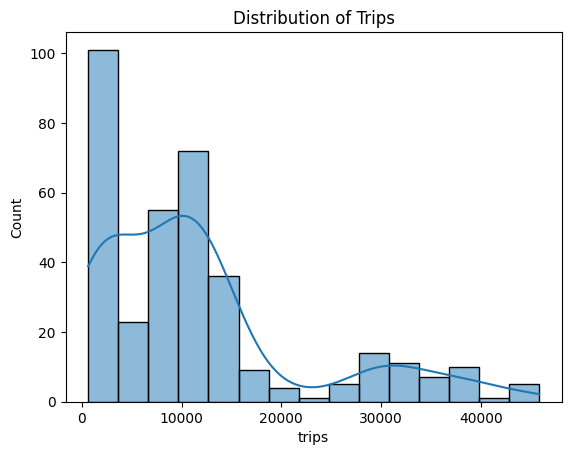

In [9]:
sns.histplot(df['trips'],kde=True)
plt.title('Distribution of Trips')
plt.show()

The histogram shows that most dispatch bases complete between ~2,000 and 12,000 trips per day. The distribution is right-skewed, meaning there are a few days or bases with very high trip counts (20K–45K) but these are much less common.

The KDE curve confirms that lower-to-mid trip volumes occur more frequently, while extremely high trip volumes are rare outliers. This indicates that the majority of operations run at an average-to-moderate activity level, with only a small number of very busy periods.

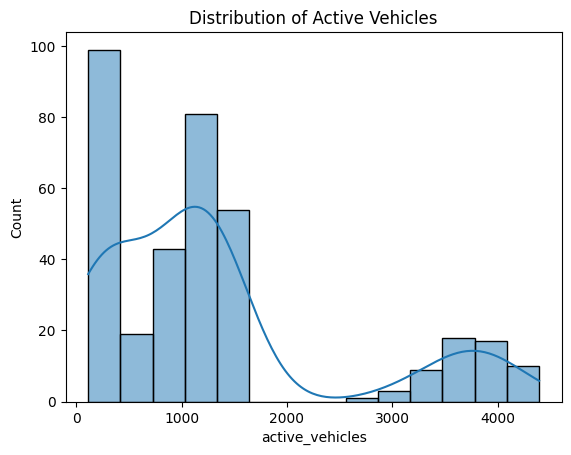

In [12]:
sns.histplot(df['active_vehicles'],kde=True)
plt.title('Distribution of Active Vehicles')
plt.show()

The distribution of active vehicles is right-skewed, meaning most dispatch bases operate with fewer vehicles (generally between ~200 and 1,500), while only a small number of cases have very high fleet sizes (3,000–4,500 vehicles).

The KDE curve shows a clear concentration in the lower range, indicating that smaller to mid-sized fleets are much more common, whereas large fleets are rare outliers.

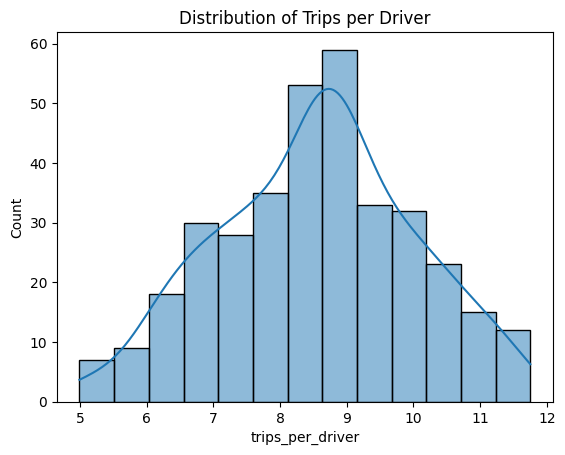

In [13]:
sns.histplot(df['trips_per_driver'],kde=True)
plt.title('Distribution of Trips per Driver')
plt.show()

The trips_per_driver distribution is approximately normal (bell-shaped) and centered around 8–9 trips per driver per day. Most drivers complete between 7 and 10 trips daily, while very few complete fewer than 6 or more than 11 trips.

This indicates that driver productivity is fairly consistent across the fleet, unlike total trips or active vehicles, which show much larger variation.

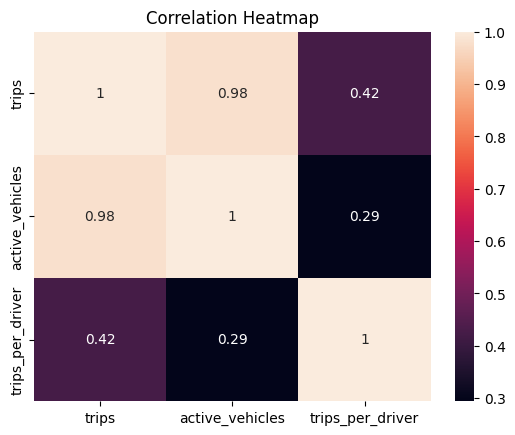

In [15]:
sns.heatmap(df[['trips','active_vehicles','trips_per_driver']].corr(),annot = True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap suggests that total trip volume is primarily driven by how many vehicles are active. Meanwhile, driver productivity remains relatively stable, even when operational scale increases.

This insight helps understand how Uber scales its fleet to meet demand while maintaining balanced workload distribution among drivers.

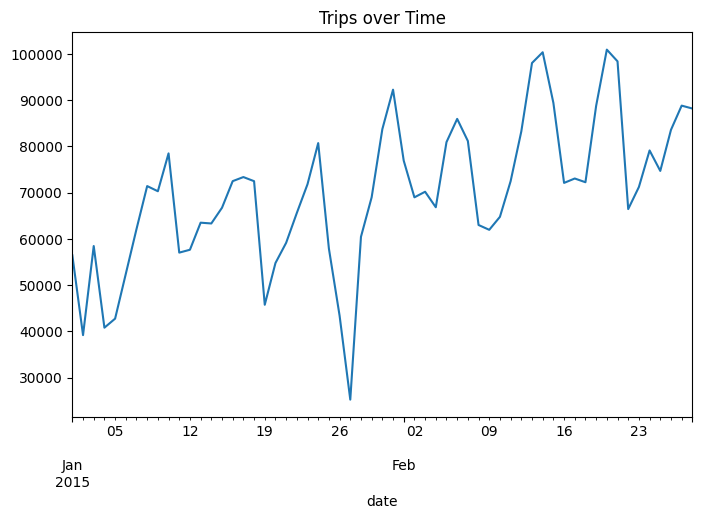

In [20]:
df.groupby('date')['trips'].sum().plot(figsize = (8,5))
plt.title('Trips over Time')
plt.show()

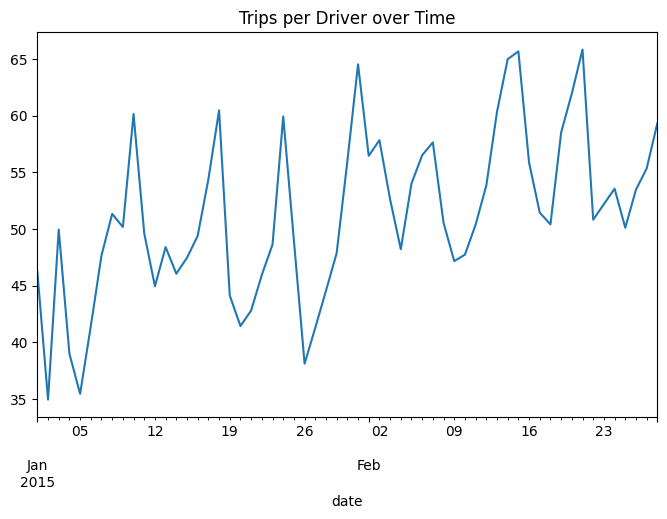

In [21]:
df.groupby('date')['trips_per_driver'].sum().plot(figsize = (8,5))
plt.title('Trips per Driver over Time')
plt.show()

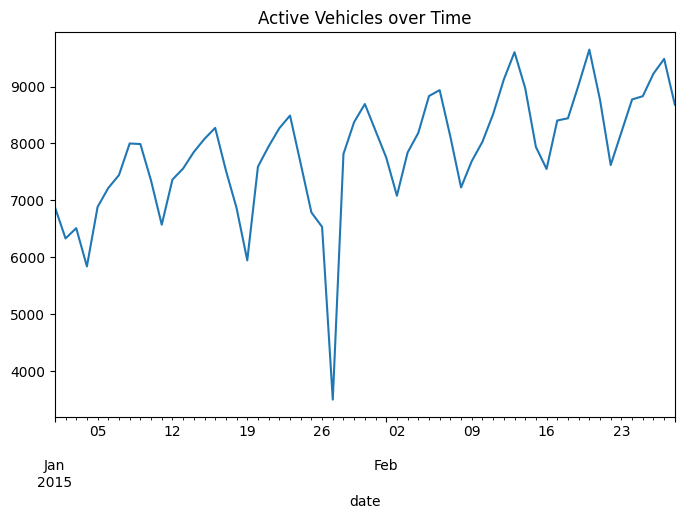

In [23]:
df.groupby('date')['active_vehicles'].sum().plot(figsize = (8,5))
plt.title('Active Vehicles over Time')
plt.show()

**We explored the dataset visually and statistically, understood the distributions and relationships between key variables, and identified key operational trends in Uber activity over time.**